In [1]:
# Insert your anonymous exam ID as a string in the variable below
examID="..."

## Exam vB PROBLEM 1
In this problem you will do rejection sampling from complicated distributions, you will also be using
your samples to compute certain integrals, a method known as Monte Carlo integration: (Keep in
mind that choosing a good sampling distribution is often key to avoid too much rejection)

1. [4p] Fill in the remaining part of the function problem1_inversion in order to produce samples
from the below distribution using rejection sampling:

$$
F[x] = \begin{cases}
  0, \quad &x\leq 0\\
  \frac{e^{x^2}-1}{e-1}, \quad &0<x<1\\
  1, \quad &x\geq1
\end{cases}
$$

In [2]:
# Part 1
from Utils import timeout
import numpy as np
from scipy.stats import beta
from scipy.special import gamma
@timeout()
def problem1_inversion(n_samples=1):
  # Distribution from part 1
  # write the code in this function to produce samples from the distribution in the assignment
  # Make sure you choose a good sampling distribution to avoid unnecessary rejections
  #f = lambda x: 0 if x <= 0 else ( (np.exp(x**2)-1)/(np.e-1) if x < 1 else 1)
  f = lambda x: 2*x*np.exp(x**2)/(np.e-1)

  alpha = 2.1
  beta_param = 0.9
  B = gamma(alpha+beta_param)/(gamma(alpha)*gamma(beta_param))
  g = lambda x: beta.pdf(x, alpha, beta_param)
  g = lambda x: np.power(x, alpha-1)*np.power(1-x, beta_param-1)*B
  M = 1.2
  samples = []
  rejections = 0
  while len(samples) < n_samples:
    x = np.random.beta(alpha, beta_param)
    r = f(x)/(M*g(x))
    U = np.random.random()
    if U <= r:
      samples.append(x)
    else:
      rejections += 1
  print(f"{rejections} rejections ({int(100*rejections/(n_samples+rejections))}%)")
  # Return a numpy array of length n_samples
  return np.array(samples)


2. [2p] Produce 100000 samples (**use fewer if it times-out and you cannot find a solution**)
and put the answer in `problem1_samples` from the above distribution and plot the histogram
together with the true density. (*There is a timeout decorator on this function and if it takes
more than 10 seconds to generate 100000 samples it will timeout and it will count as if you
failed to generate.*)

19600 rejections (16%)
(100000,)


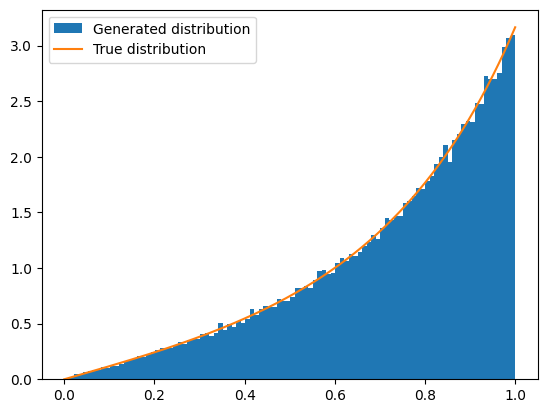

In [3]:
# Part 2

problem1_samples = problem1_inversion(100000) #100000

print(problem1_samples.shape)
import matplotlib.pyplot as plt
f = lambda x: 2*x*np.exp(x**2)/(np.e-1)
space = np.linspace(0,1,100000)
vfunc = np.vectorize(f)
true_dist = vfunc(space)
plt.hist(problem1_samples, density=True, bins=100, label="Generated distribution")
plt.plot(space, true_dist, label="True distribution")
plt.legend()
plt.show()

3. [2p] Use the above 100000 samples (problem1_samples) to approximately compute the integral

$$
  \int_{0}^1 \sin(x)\frac{2e^{x^2}x}{e-1}dx
$$
and store the result in `problem1_integral`.

In [4]:
# Part 3

problem1_integral = np.mean(np.sin(problem1_samples))
problem1_integral

0.6528900181702191

4. [2p] Use Hoeffdings inequality to produce a 95% confidence interval of the integral above and
store the result as a tuple in the variable `problem1_interval`

In [5]:
# Part 4
from Utils import compute_confidence_interval_bounded
problem1_interval = compute_confidence_interval_bounded(np.sin(problem1_samples), 0.05, 0, 1)
problem1_interval

(0.6485953240867517, 0.6571847122536865)

5. [4p] Fill in the remaining part of the function problem1_inversion_2 in order to produce samples from the below distribution using rejection sampling:
$$
F[x] = \begin{cases}
  0, \quad &x\leq 0\\
  20xe^{20-1/x}, \quad &0<x<\frac{1}{20}\\
  1, \quad &x\geq \frac{1}{20}
\end{cases}
$$
Hint: this is tricky because if you choose the wrong sampling distribution you reject at least
9 times out of 10. You will get points based on how long your code takes to create a certain number of samples, if you choose the correct sampling distribution you can easily create 100000
samples within 2 seconds.

1248 rejections (1%)
(100000,)


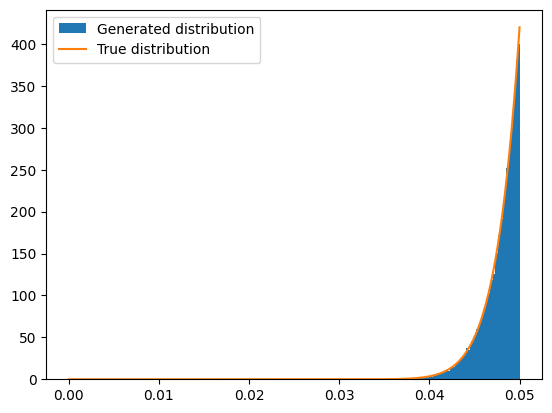

0.0499999530237778


In [6]:
# Part 5

@timeout()
def problem1_inversion_2(n_samples=1):
  # Distribution from part 1
  # write the code in this function to produce samples from the distribution in the assignment
  # Make sure you choose a good sampling distribution to avoid unnecessary rejections
  #f = lambda x: 0 if x <= 0 else ( (np.exp(x**2)-1)/(np.e-1) if x < 1 else 1)
  f = lambda x: 20*np.exp(20-1/x)*(x+1)/x if 0<x<=1/20 else 0
  a = 21
  g = lambda x: 20**a*a*np.power(x, a-1)
  M = 1
  samples = []
  rejections = 0
  while len(samples) < n_samples:
    x = np.random.power(a)/20
    r = f(x)/(M*g(x))
    U = np.random.random()
    if U <= r:
      samples.append(x)
    else:
      rejections += 1
  print(f"{rejections} rejections ({int(100*rejections/(n_samples+rejections))}%)")
  # Return a numpy array of length n_samples
  return np.array(samples)

problem2_samples = problem1_inversion_2(100000) #100000

print(problem2_samples.shape)
import matplotlib.pyplot as plt
f = lambda x: 20*np.exp(20-1/x)*(x+1)/x
space = np.linspace(1/2000000,1/20,100000)
vfunc = np.vectorize(f)
true_dist = vfunc(space)
plt.hist(problem2_samples, density=True, bins=100, label="Generated distribution")
plt.plot(space, true_dist, label="True distribution")
plt.legend()
plt.show()
print(max(problem2_samples))

### Local test problem 1

In [7]:
# This cell is just to check that you got the correct formats of your answer
import numpy as np
try:
  assert(isinstance(problem1_inversion(10), np.ndarray))
except:
  print("Try again. You should return a numpy array from problem1_inversion")
else:
  print("Good, your problem1_inversion returns a numpy array")
try:
  assert(isinstance(problem1_samples, np.ndarray))
except:
  print("Try again. your problem1_samples is not a numpy array")
else:
  print("Good, your problem1_samples is a numpy array")
try:
  assert(isinstance(problem1_integral, float))
except:
  print("Try again. your problem1_integral is not a float")
else:
  print("Good, your problem1_integral is a float")
try:
  assert(isinstance(problem1_interval, list) or isinstance(problem1_interval, tuple)) , "problem1_interval not a tuple or list"
  assert(len(problem1_interval) == 2) , "problem1_interval does not have length 2, it should have a lower bound and an upper bound"
except Exception as e:
  print(e)
else:
  print("Good, your problem1_interval is a tuple or list of length 2")
try:
  assert(isinstance(problem1_inversion_2(10), np.ndarray))
except:
  print("Try again. You should return a numpy array from problem1_inversion_2")
else:
  print("Good, your problem1_inversion_2 returns a numpy array")


1 rejections (9%)
Good, your problem1_inversion returns a numpy array
Good, your problem1_samples is a numpy array
Good, your problem1_integral is a float
Good, your problem1_interval is a tuple or list of length 2
0 rejections (0%)
Good, your problem1_inversion_2 returns a numpy array


## Exam vB PROBLEM 2
Let us build a proportional model ($P(Y = 1 | X) = G(\beta_0 + \beta \cdot X)$ where $G$ is the logistic function)
for the spam vs not spam data. Here we assume that the features are presence vs not presence of a
word, let $X_1$, $X_2$, $X_3$ denote the presence (1) or absence (0) of the words ("free", ”prize”, ”win”).


1. [2p] Load the file `data/spam.csv` and create two numpy arrays, `problem2_X` which has
shape (n_emails,3) where each feature in `problem2_X` corresponds to X1, X2, X3 from above,
`problem2_Y` which has shape (n_emails,) and consists of a 1 if the email is spam and 0 if
it is not. Split this data into a train-calibration-test sets where we have the split 40%, 20%,
40%, put this data in the designated variables in the code cell.

In [8]:
# Part 1
import pandas as pd
data = pd.read_csv("data/spam.csv", encoding="windows-1252")
v2 = data["v2"]

problem2_X = np.array([["free" in x.casefold(), "prize" in x.casefold(), "win" in x.casefold()] for x in v2]).astype(int)
problem2_Y = (data["v1"] == "spam").to_numpy(dtype=int)
print(problem2_X.shape, problem2_Y.shape)

from Utils import train_test_validation
(problem2_X_train, problem2_X_calib, problem2_X_test, 
  problem2_Y_train, problem2_Y_calib, problem2_Y_test) = train_test_validation(problem2_X, problem2_Y, test_size=0.2, validation_size=0.4, random_state=42) 

print(problem2_X_train.shape,problem2_X_calib.shape,problem2_X_test.shape,problem2_Y_train.shape,problem2_Y_calib.shape,problem2_Y_test.shape)

(5572, 3) (5572,)
(2228, 3) (1114, 3) (2230, 3) (2228,) (1114,) (2230,)


2. [4p] Follow the calculation from the lecture notes where we derive the logistic regression and
implement the final loss function inside the class `ProportionalSpam`. You can use the `Test`
cell to check that it gives the correct value for a test-point.

In [96]:
# Part 2

class ProportionalSpam(object):
  def __init__(self):
    self.coeffs = None
    self.result = None
  
  # define the objective/cost/loss function we want to minimise
  def loss(self,X,Y,coeffs):
      x = np.hstack((np.ones((X.shape[0], 1)), X))
      Z = 2*Y - 1
      Bx = coeffs @ x.T
      
      return np.mean(np.log(1 + np.exp(-Z*Bx)))
        
  def fit(self,X,Y):
    import numpy as np
    from scipy import optimize

    #Use the f above together with an optimization method from scipy
    #to find the coefficients of the model
    opt_loss = lambda coeffs: self.loss(X,Y,coeffs)
    initial_arguments = np.zeros(shape=X.shape[1]+1)
    self.result = optimize.minimize(opt_loss, initial_arguments,method='cg')
    self.coeffs = self.result.x
  def predict(self,X):
    #Use the trained model to predict Y
    if (self.coeffs is not None):
      G = lambda x: np.exp(x)/(1+np.exp(x))
      return np.round(10*G(np.dot(X,self.coeffs[1:])+self.coeffs[0]))/10 #This rounding is to help you with the calibration

3. [4p] Train the model `problem2_ps` on the training data. The goal is to calibrate the probabilities output from the model. Start by creating a new variable `problem2_X_pred` (shape(n_samples,1)) which consists of the predictions of `problem2_ps` on the calibration dataset. Then train a calibration model using `sklearn.tree.DecisionTreeRegressor`, store this trained model in `problem2_calibrator`.

In [97]:
# Part 3
problem2_ps = ProportionalSpam()
problem2_ps.fit(problem2_X_train, problem2_Y_train)

problem2_X_pred = problem2_ps.predict(problem2_X_calib).reshape(-1, 1)
print(f"problem2_X_pred.shape: {problem2_X_pred.shape}")

from sklearn.tree import DecisionTreeRegressor as DTR

problem2_calibrator = DTR()
problem2_calibrator.fit(problem2_X_pred, problem2_Y_calib)

problem2_X_pred.shape: (1114, 1)


DecisionTreeRegressor()

4. [3p] Use the trained model `problem2_ps` and the calibrator `problem2_calibrator` to make
final predictions on the testing data, store the prediction in `problem2_final_predictions`.
Compute the 0-1 test-loss and store it in `problem2_01_loss` and provide a 99% confidence
interval of it, store this in the variable `problem2_interval`, this should again be a tuple as in
problem1.

In [98]:
# Part 4

# These are the predicted probabilities
X_test_pred = problem2_ps.predict(problem2_X_test).reshape(-1, 1)
problem2_final_predictions = problem2_calibrator.predict(X_test_pred)

# In order to compute this loss we first need to convert the predicted probabilities to a decision
# recall the Bayes classifier?
class_predictions = (problem2_final_predictions > 0.5).astype(int)
print(class_predictions)
problem2_01_loss = (class_predictions != problem2_Y_test).astype(int)
print(problem2_01_loss)

# Recall the interval is given as a tuple (a,b) or a list [a,b]
problem2_interval = compute_confidence_interval_bounded(problem2_01_loss, 0.05, 0, 1)
problem2_interval

[0 0 1 ... 0 0 0]
[0 0 0 ... 0 0 0]


(0.06451414384818517, 0.12203294135360855)

### Local test problem 2

In [99]:
try:
  import numpy as np
  test_instance = ProportionalSpam()
  test_loss = test_instance.loss(np.array([[1,0,1],[0,1,1]]),np.array([1,0]),np.array([1.2,0.4,0.3,0.9]))
  assert (np.abs(test_loss-1.2828629432232497) < 1e-6)
  print("Your loss was correct for a test point")
except:
  print("Your loss was not correct on a test point")

Your loss was correct for a test point


## Exam vB PROBLEM 3

In [100]:
# PART 1

#------------------------TRANSITION MATRIX -------------------------------
# Answer each one by supplying the transition matrix as a numpy array
# of shape (n_states,n_states), where state (A,B,...) corresponds to index (0,1,...)

problem3_A = ...
problem3_B = ...
problem3_C = ...
problem3_D = ...

In [101]:
# PART 2
#------------------------REDUCIBLE -------------------------------
# Answer each one with a True or False

problem3_A_irreducible = ...
problem3_B_irreducible = ...
problem3_C_irreducible = ...
problem3_D_irreducible = ...

In [102]:
# PART 3
#------------------------APERIODIC-------------------------------
# Answer each one with a True or False

problem3_A_is_aperiodic = ...
problem3_B_is_aperiodic = ...
problem3_C_is_aperiodic = ...
problem3_D_is_aperiodic = ...

# Answer the following with the period of the states as a numpy array
# of shape (n_states,)

problem3_A_periods = ...
problem3_B_periods = ...
problem3_C_periods = ...
problem3_D_periods = ...

In [103]:
# PART 4
#------------------------STATIONARY DISTRIBUTION-----------------
# Answer each one with a True or False

problem3_A_has_stationary = ...
problem3_B_has_stationary = ...
problem3_C_has_stationary = ...
problem3_D_has_stationary = ...

# Answer the following with the stationary distribution as a numpy array of shape (n_states,)
# if the Markov chain has a stationary distribution otherwise answer with False

problem3_A_stationary_dist = ...
problem3_B_stationary_dist = ...
problem3_C_stationary_dist = ...
problem3_D_stationary_dist = ...

In [104]:
# PART 5
#------------------------REVERSIBLE-----------------
# Answer each one with a True or False

problem3_A_is_reversible = ...
problem3_B_is_reversible = ...
problem3_C_is_reversible = ...
problem3_D_is_reversible = ...